<h1 align=center><font size=5>Introduction to Tensorflow</font></h1>

## Table of contents

- [Introduction](#intro)
- [Getting started with Tensorflow](#start-TF)
- [Tensorflow vs Numpy](#TF-np)
- [Linear regression with Tensorflow](#TF-LR)
- [Logistic regression with Tensorflow](#TF-LogiR)
- [Summary](#summary)

## Introduction <a id='intro'></a>


As you learned from the course, the big idea of tensorflow is to express a numeric computation as a graph. It basically consists of two phases:
- __Construction phase__: here, you need to define graph of computations;
- __Execution phase__: In this step, you evaluate the computational graph.

Note that in the exection phase, you need to follow the following steps, respectively:
- Open a tensorflow session (placing the operations onto devices like CPUs or GPUs);
- Initialize all the variables;
- Evaluate the session;
- Close the session to free up resources.

## Getting started with Tensorflow <a id='start-TF'></a>

Let us start with importing the tensorflow and check its version.

In [1]:
import tensorflow as tf

print(tf.__version__)

1.15.0


In this course, we consider first version of tensorflow.

#### Construction phase

In [2]:
x = tf.Variable(3)
y = tf.Variable(4)

z = x + y

print(z)

Tensor("add:0", shape=(), dtype=int32)


As you can see, the above code doesn't perform any computation. It just creates the computation graph.

#### Execution phase

1. Create a session

In [0]:
sess = tf.Session()

2. Initialize all the variables

In [0]:
sess.run(x.initializer)
sess.run(y.initializer)

3. Evaluate the session

In [5]:
result = sess.run(z)

print(result)

7


4. Close the session

In [0]:
sess.close()

Note that, we can initialize all the variables with only one syntax. Plus, we can automatically close tensorflow session as the following.

In [7]:
x = tf.Variable(3)
y = tf.Variable(4)

z = x + y

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()    
    print(z.eval())

7


Tensorflow also has __Eager mode__ that makes it easier to try out things, but is not recommended for production code. Note that, Eager mode must be called at program startup.

In [8]:
# You need to run this code at program startup!
'''import tensorflow as tf
from tensorflow.contrib.eager.python import tfe
tfe.enable_eager_execution()

x = tf.Variable(3)
y = tf.Variable(4)

z = x + y

print(z)'''

'import tensorflow as tf\nfrom tensorflow.contrib.eager.python import tfe\ntfe.enable_eager_execution()\n\nx = tf.Variable(3)\ny = tf.Variable(4)\n\nz = x + y\n\nprint(z)'

## Tensorflow vs  Numpy <a id='TF-np'></a>

In this part, we compare some basic functions like shape, sum and reshape in tensorflow and numpy.

In [9]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6]])

print(a.shape)

print(np.sum(a, axis=1))

print(np.reshape(a, (1, 6)))

(2, 3)
[ 6 15]
[[1 2 3 4 5 6]]


In [10]:
tf.InteractiveSession()

a = tf.constant([[1, 2, 3], [4, 5, 6]])

print(a.get_shape())

print(tf.reduce_sum(a, reduction_indices= 1).eval())

print(tf.reshape(a, (1, 6)).eval())

tf.InteractiveSession().close()

(2, 3)
[ 6 15]
[[1 2 3 4 5 6]]


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## Linear regression with Tensorflow <a id='TF-LR'></a>

Let us consider the following data:

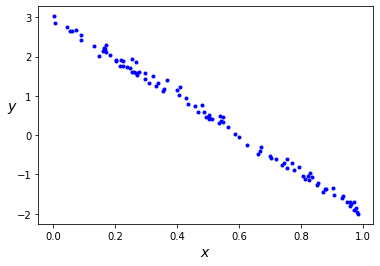

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100 # Number of samples

x = np.random.rand(N, 1)
y = 3 - 5 * x + 0.1*np.random.randn(N, 1)

plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.show()

&#x270d; Compute the model parameters using sklearn.

In [12]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x, y)

print('Intercept: \n', lr_model.intercept_)
print('Coefficient(s): \n', lr_model.coef_)

Intercept: 
 [2.968562]
Coefficient(s): 
 [[-4.92652036]]


&#x270d; Compute the model parameters with analytical approach using numpy.

In [14]:
X = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
params = ((np.linalg.inv( (X.T).dot(X) )).dot(X.T)).dot(y)

print('Estimated parameters:\n', params)

Estimated parameters:
 [[-4.92652036]
 [ 2.968562  ]]


&#x270d; Compute the model parameters using tensorflow. 

Hints: For matrix multiplication, matrix transpose and matrix inversion, you can use *tf.matmul()*, *tf.transpose()*, and *tf.matrix_inverse()*, respectively.

In [22]:
X = tf.concat((x, tf.ones([x.shape[0], 1])), axis=1) #, shape=(N,2,))
Y = tf.constant(y.astype(np.float32))
XT = tf.transpose(X)
#print(X, Y, XT)
inv = tf.matrix_inverse(tf.matmul(XT,X))
params = tf.matmul(tf.matmul(inv,XT),Y)       #tf.cast(x, tf.float32).

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    print('Estimated parameters:\n', params.eval())

Estimated parameters:
 [[-4.926525 ]
 [ 2.9685647]]


## Logistic regression with Tensorflow <a id='TF-LogiR'></a>

Consider the following data example:

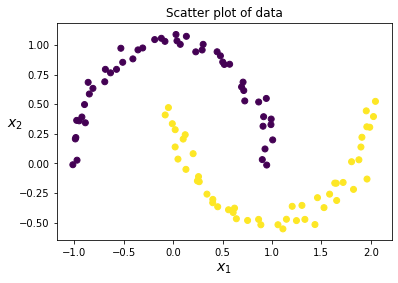

In [23]:
from sklearn.datasets import make_moons

N = 100
x, y = make_moons(n_samples= N, noise= .05)

plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel('$x_1$', fontsize = 14)
plt.ylabel('$x_2$', rotation = 0, fontsize = 14)
plt.title('Scatter plot of data');

&#x270d; Classify the data using sklearn.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

logR_model = LogisticRegression()
logR_model.fit(x_train, y_train)

y_train_pred = logR_model.predict(x_train)
y_test_pred = logR_model.predict(x_test)

print("Training Accuracy: {0:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Testing Accuracy: {0:.2f}".format(accuracy_score(y_test, y_test_pred)))

#report = classification_report(y_test, y_test_pred)
#print(report)

Training Accuracy: 0.84
Testing Accuracy: 0.90


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


&#x270d; Classify the data using tensorflow.

Hints: 
1. Use *tf.placeholder* and *tf.Variable* for feeding data and trainable parameters, respectively.
2. The backpropagation and optimization can be done automatically by running the session on the "optimizer" object.

In [133]:
n_itr = 1000        # number of iterations
eta = 0.1           # learning rate
# ----------------------------------------------------------------
X_train = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
Y_train = np.reshape(y, (y.shape[0], 1))

print('X_train shape :', X_train.shape)
print('Y_train shape :', Y_train.shape)
# ----------------------------------------------------------------
X = tf.placeholder(tf.float32, shape=X_train.shape)
Y = tf.placeholder(tf.float32, shape=(Y_train.shape[0], 1))

print('X shape :', X) #.get_shape())
print('Y shape :', Y) #.get_shape())
# ----------------------------------------------------------------
# Trainable parameters
theta = tf.Variable(tf.zeros([X_train.shape[1], 1]))
print('theta shape :', theta.get_shape())
# ----------------------------------------------------------------
Y_p2 = 1.0/(1.0+tf.exp(-tf.matmul(X, theta)))
Y_prob = tf.nn.sigmoid(tf.matmul(X,theta))
print('Y_prob shape :', Y_prob.shape)

# Sigmoid cross entropy cost function 
cost = (1.0/N)*tf.reduce_sum(-Y*tf.log(Y_prob) - (1-Y)*tf.log(1-Y_prob))

# Gradient descent optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=eta).minimize(loss=cost)

# Accuracy
correct_pred = tf.cast(tf.math.equal(tf.round(Y_prob), Y), tf.float16)
print("correct_pred :", correct_pred)  
accuracy = tf.reduce_mean(correct_pred) 
     
# Global variables initializer 
init = tf.global_variables_initializer()
# ----------------------------------------------------------------
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    init.run() 

    cost_history, accuracy_history = [], [] 
    for itr in range(n_itr): 
        
        # Pick an offset within the training data, which has been randomized.
        XY_feed = {X : X_train, Y : Y_train}

        # Running the optimizer 
        sess.run(optimizer, feed_dict=XY_feed) 
        #print("optimizer :", optimizer)

        # Calculating cost & accuracy on current epoch
        c, acc  = sess.run([cost, accuracy], feed_dict=XY_feed) #["Y"]) 
        #print("cost eval :", c) #.eval())
        #print("accuracy eval :", acc) #.eval())
        
        # Storing cost & accuracy to the history 
        cost_history.append(c)
        accuracy_history.append(acc)

# ----------------------------------------------------------------
print('Classification accuracy:', accuracy_history[-1])

X_train shape : (100, 3)
Y_train shape : (100, 1)
X shape : Tensor("Placeholder_174:0", shape=(100, 3), dtype=float32)
Y shape : Tensor("Placeholder_175:0", shape=(100, 1), dtype=float32)
theta shape : (3, 1)
Y_prob shape : (100, 1)
correct_pred : Tensor("Cast_34:0", shape=(100, 1), dtype=float16)
Classification accuracy: 0.86


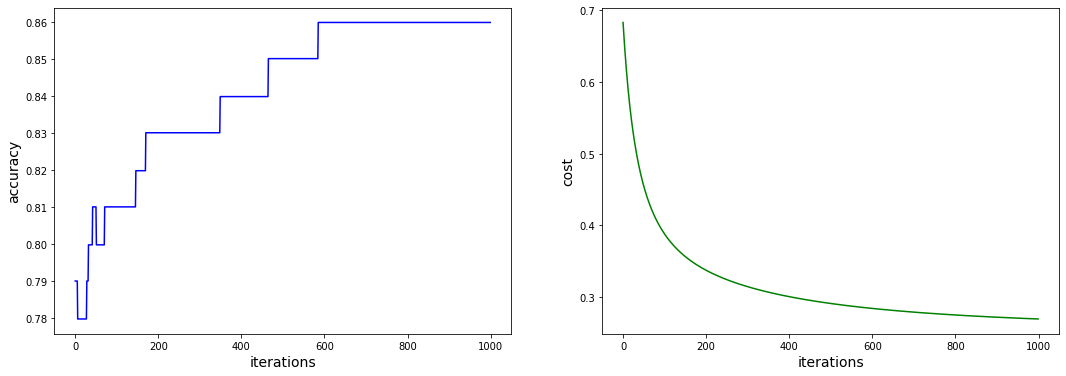

In [141]:
# ----------------------------------------------------------------
# plot graphs
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(list(range(n_itr)), accuracy_history, 'b', label="accuracy_history")
plt.xlabel('iterations', fontsize = 14)
plt.ylabel('accuracy', rotation = 90, fontsize = 14)
plt.subplot(122)
plt.plot(list(range(n_itr)), cost_history, 'g', label="cost_history")
plt.xlabel('iterations', fontsize = 14)
plt.ylabel('cost', rotation = 90, fontsize = 14)
#plt.legend(loc='best')
plt.show()

## Summary <a id='summary'></a>

- We learned how to code in tensorflow by taking the following steps:
    - Building a computation graph containing Tensors and Operations;
    - Creating a session;
    - Initializing the session;
    - Running the session to execute the graph.
- We learned how to use Eager mode for evaluating operations immediately, without building graphs.   
- We explored some differences between tensorflow and numpy.
- We implemented linear regression and logistic regression from scratch in both numpy and tensorflow.